# Context

*An e-commerce company is currently redesigning their entire website, but they know they can’t just launch straight into a new design, so start with testing the placement of icons in the new website’s header By putting the icons above the search bar, instead of below, and so on.*


The steps they take and the metrics that interested for them are :


1. Homepage header icons : **CTR** Click Through Rate, **Session Time**.
2. Payment options : **AOV** Average Order Value, **Conversion Rate**.
3. Product Description Pages (PDPs) :**Engagement time**, **CTR** Call To Action(CTA) by changing the buy button into order button.
4. Email Sign-up Banner : **Conversion Rate** by changing the color of an email sign-up banner.

**NOTICE :**
    
In this case, we should only consider good CTR, or conversion Rate is above 15%.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

import random
plt.style.use('ggplot')

### # Homepage - CTR

- The first change to the homepage new design that the company did is changing the place of the icons in the header under the search bar to the upper side, and they ran the experiment for 2 weeks..

In [3]:
df_homepage = pd.read_csv('ecommerce_homepage_actions.csv')
df_homepage.head(6)

,id,group,page,actions
0,14893,control,old page,view
1,13694,control,old page,view
2,17431,treatment,new page,click
3,18327,treatment,new page,view
4,14940,control,old page,view
5,17167,treatment,new page,view


### **Click Through Rate (CTR) Function**

In [4]:
def CTR_func(clicks, views):
    ctr = clicks / views
    return round(ctr, 2)*100

**Click Through Rate (CRT) Of The Old Page**

In [5]:
click_old = df_homepage.query('page == "old page" & actions == "click"').id.nunique()
view_old = df_homepage.query('page == "old page" & actions == "view"').id.nunique()
conv_rate_homepage_old = CTR_func(click_old, view_old)
print('The CTR of the old page is: {} %'.format(round(conv_rate_homepage_old, 1)))

The CTR of the old page is: 57.0 %


**Click Through Rate (CRT) Of The New Page**

In [6]:
click_new = df_homepage.query('page == "new page" & actions == "click"').id.nunique()
view_new = df_homepage.query('page == "new page" & actions == "view"').id.nunique()
conv_rate_homepage_new = CTR_func(click_new, view_new)
print('The CTR of the new page is: {} %'.format(conv_rate_homepage_new))

The CTR of the new page is: 64.0 %


**The Difference Between The Old & New Pages**

In [7]:
diff_homepage = conv_rate_homepage_new - conv_rate_homepage_old
print('The difference between the old and the new page is : {} %'.format(round(diff_homepage, 1)))

The difference between the old and the new page is : 7.0 %


At the level of significance (0.05), Do we have significant evidence to say there's a difference in the CTR rates of the two page ?

**Null Hypothesis** : CTR *new* - CTR *old* =< 0

**Alternative Hypothesis** : CTR *new* - CTR *old* > 0

In [8]:
diffs_list = []

for diff in range(10000):
    b_samp = df_homepage.sample(df_homepage.shape[0], replace=True)
    click_old = b_samp.query('page == "old page" & actions == "click"').id.nunique()
    view_old = b_samp.query('page == "old page" & actions == "view"').id.nunique()
    click_new = b_samp.query('page == "new page" & actions == "click"').id.nunique()
    view_new = b_samp.query('page == "new page" & actions == "view"').id.nunique()
    conv_rate_homepage_old = CTR_func(click_old, view_old)
    conv_rate_homepage_new = CTR_func(click_new, view_new)
    
    diffs_list.append(conv_rate_homepage_new - conv_rate_homepage_old)
len(diffs_list)

10000

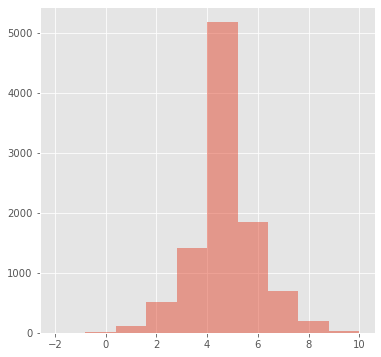

In [10]:
plt.figure(figsize=(6,6))
plt.hist(diffs_list, alpha = 0.5);

In [11]:
diff_arr = np.array(diffs_list)
null_vals = np.random.normal(0, diff_arr.std(), diff_arr.size)

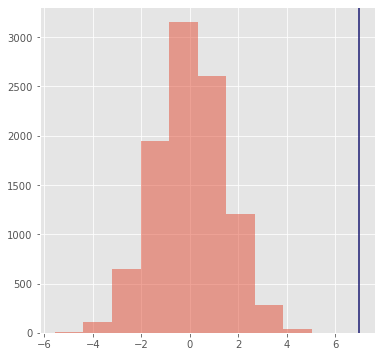

In [12]:
plt.figure(figsize=(6,6))
plt.hist(null_vals, alpha = 0.5)
plt.axvline(x=diff_homepage, color='#191970')

In [13]:
p_val = (null_vals > diff_homepage).mean()
p_val

0.0

### **Conclusion**

- P-value of **0.0** indicates that it's highly significant, and it suggests there was absolutely no chance of getting this result if the null hypothesis was true, or we can say it's very unlikely that occurred by chance alone. Therefore , we reject our null in favor of an alternative hypothesis..

- With **95% confidence**, there's enough statistical evidence to say that there's a difference between the CTRs of the homepage between new and old pages..

**Is this difference practically significant?**

- In practical perspective, **7%** uplift in the click-through-rate may not be a significant difference, but for certain we can say the new design helped to improve the CTR more than the old design..

### # Homepage - Session Time

- After the increment in the CTR, the company plans to do more adjustments to the homepage since it's the landing page and the most important page it represents the image of the brand that will make users engage with their products and content. Therefore, they did the adjustments like : changing icons placements, adding symbols, changing color and font size, ... , etc. Now they are interested to see if these small adjustments helped to make users more engaged with the website. And they run the experiment for 2 weeks..

In [14]:
df_sessions = pd.read_csv('homepage_sessions.csv')
df_sessions.head(7)

,id,group,page,session_time
0,13222,control,old page,3.4
1,16810,treatment,new page,5.2
2,15372,control,old page,3.9
3,15342,control,old page,1.7
4,13358,control,old page,3.0
5,18248,treatment,new page,4.3
6,14724,control,old page,4.8


**The AVG OF The Session Time Of The Old Page**

In [15]:
avg_session_old = df_sessions.query('page == "old page"').session_time.mean()
print('The AVG of the session time of the old page is : {} minutes'.format(round(avg_session_old, 1)))

The AVG of the session time of the old page is : 3.0 minutes


**The AVG OF The Session Time Of The New Page**

In [16]:
avg_session_new = df_sessions.query('page == "new page"').session_time.mean()
print('The AVG of the session time of the new page is : {} minutes'.format(round(avg_session_new, 1)))

The AVG of the session time of the new page is : 5.0 minutes


**The Difference Between The AVGs Of The Old & New Pages**

In [17]:
diff_sess = avg_session_new - avg_session_old
print('The difference between the AVGs of the old & new pages is: {} minutes'.format(round(diff_sess, 1)))

The difference between the AVGs of the old & new pages is: 2.0 minutes


At the level of significance (0.05), Do we have significant evidence to say there's a difference in the averge session time of the two page ?

**Null Hypothesis** : AVG Session Time *(new)* - AVG Session Time *(old)* =< 0

**Alternative Hypothesis** : AVG Session Time *(new)* - AVG Session Time *(old)* > 0

In [18]:
diffs_sess_list = []

for diff in range(10000):
    b_samp = df_sessions.sample(df_sessions.shape[0], replace=True)
    avg_session_old = b_samp.query('page == "old page"').session_time.mean()
    avg_session_new = b_samp.query('page == "new page"').session_time.mean()
    diffs_sess_list.append(avg_session_new - avg_session_old)
len(diffs_sess_list)

10000

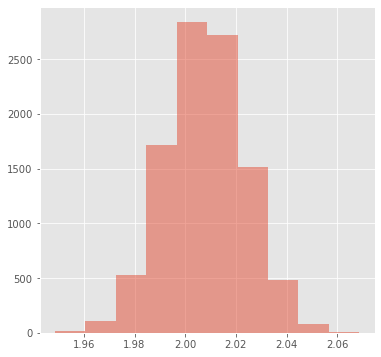

In [19]:
plt.figure(figsize=(6,6))
plt.hist(diffs_sess_list, alpha = 0.5);

In [20]:
diff_sess_arr = np.array(diffs_sess_list)
null_sess_vals = np.random.normal(0, diff_sess_arr.std(), diff_sess_arr.size)

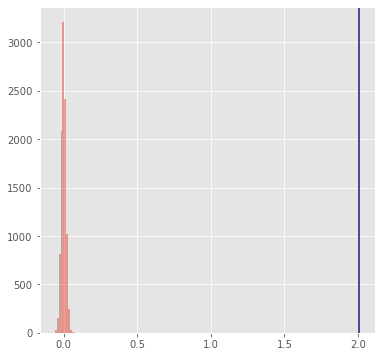

In [21]:
plt.figure(figsize=(6,6))
plt.hist(null_sess_vals, alpha = 0.5)
plt.axvline(x=diff_sess, color='#191970')

In [22]:
p_val = (null_sess_vals > diff_sess).mean()
p_val

0.0

### **Conclusion**

- The p-value result **0.0** suggests we absolutely didn't get this result by chance alone. Thus , we reject our null in favor of an alternative hypothesis..

- With **95% confidence**, there's statistical evidence to say that there's a difference between the AVGs of the session time between new and old pages..

**Is this difference practically significant?**

- Practically speaking , even if we getting a very significant test result, the new design obviously makes the visitors more engaged for more than **2 minutes** on average, so there's improvement and we can run the experiment for more time and observe how the visitors behave and interact with the new design..

### #Payment Methods - Average Order Value (AOV)

- The company introduced new payment methods within the new design, and they ran the experiment for 2 weeks , observing how the customers dealt with the more of payment options..

In [23]:
df_paymnt = pd.read_csv('payment_opt.csv')
df_paymnt

,id,group,page,payment_opt,transacions,revenue
0,21773,treatment,new page,Postpaid Methods,6,2168.4
1,23838,treatment,new page,Apple Pay,5,1262.9
2,11869,control,old page,Cash On Delivery (COD),3,1326.5
3,15811,control,old page,Credit Cards,3,1106.1
4,14750,control,old page,Cash On Delivery (COD),1,200.0
...,...,...,...,...,...,...
2001,18349,treatment,new page,Postpaid Methods,6,1422.7
2002,15960,control,old page,Cash On Delivery (COD),1,812.2
2003,22168,treatment,new page,Apple Pay,4,1689.0
2004,21287,treatment,new page,Apple Pay,4,3500.0


**The total transactions received during the experiment regardless of the old or new design**

In [24]:
trans_pivot = pd.pivot_table(df_paymnt, index=['group', 'page', 'payment_opt'], columns=None, values='transacions', aggfunc=np.sum)
trans_pivot.sort_values(by = 'transacions', ascending=False)

transacions
group     page     payment_opt                        
treatment new page Apple Pay                      2096
                   Postpaid Methods               1946
control   old page Credit Cards                    676
                   Cash On Delivery (COD)          646
                   PayPal                          631
treatment new page Credit Cards                    390
                   PayPal                          387
                   Cash On Delivery (COD)          363

**The total revenue received during the experiment regardless of the old or new design**

In [25]:
rev_pivot = pd.pivot_table(df_paymnt, index=['group', 'page', 'payment_opt'], columns=None, values='revenue', aggfunc=np.sum)
rev_pivot.sort_values(by = 'revenue', ascending=False)

revenue
group     page     payment_opt                     
treatment new page Apple Pay               914877.0
                   Postpaid Methods        825948.0
control   old page Cash On Delivery (COD)  264122.3
                   Credit Cards            262167.1
                   PayPal                  242002.8
treatment new page PayPal                  169179.0
                   Credit Cards            167374.8
                   Cash On Delivery (COD)  153192.8

**Ranking payment options for the control group in term of the transactions made during the last 2 weeks**

In [26]:
control_trans = df_paymnt.query('group == "control"')
group_trans = control_trans.groupby(control_trans['payment_opt'])
group_trans['transacions'].sum().sort_values(ascending = False)

payment_opt
Credit Cards              676
Cash On Delivery (COD)    646
PayPal                    631
Name: transacions, dtype: int64

**Ranking payment options for the treatment group in term of the transactions made during the last 2 weeks**

In [27]:
treatment_trans = df_paymnt.query('group == "treatment"')
group_trans = treatment_trans.groupby(treatment_trans['payment_opt'])
group_trans['transacions'].sum().sort_values(ascending = False)

payment_opt
Apple Pay                 2096
Postpaid Methods          1946
Credit Cards               390
PayPal                     387
Cash On Delivery (COD)     363
Name: transacions, dtype: int64

**Ranking payment options for the control group in term of the revenue generated during the last 2 weeks**

In [28]:
control_rev = df_paymnt.query('group == "control"')
group_rev = control_rev.groupby(control_rev['payment_opt'])
group_rev['revenue'].sum().sort_values(ascending = False)

payment_opt
Cash On Delivery (COD)    264122.3
Credit Cards              262167.1
PayPal                    242002.8
Name: revenue, dtype: float64

**Ranking payment options for the treatment group in term of the revenue generated during the last 2 weeks**

In [29]:
treatment_rev = df_paymnt.query('group == "treatment"')
group_rev = treatment_rev.groupby(treatment_rev['payment_opt'])
group_rev['revenue'].sum().sort_values(ascending = False)

payment_opt
Apple Pay                 914877.0
Postpaid Methods          825948.0
PayPal                    169179.0
Credit Cards              167374.8
Cash On Delivery (COD)    153192.8
Name: revenue, dtype: float64

**The Average Order Value (AOV) of the old page**

In [30]:
trans_old = df_paymnt.query('page == "old page"').transacions.sum()
rev_old = df_paymnt.query('page == "old page"').revenue.sum()

aov_old = rev_old/trans_old

print('The Average Order Value (AOV) of the old page is: {}'.format(round(aov_old, 1)))

The Average Order Value (AOV) of the old page is: 393.4


**The Average Order Value (AOV) of the new page**

In [31]:
trans_new = df_paymnt.query('page == "new page"').transacions.sum()
rev_new = df_paymnt.query('page == "new page"').revenue.sum()

aov_new = rev_new/trans_new

print('The Average Order Value (AOV) of the new page is: {}'.format(round(aov_new, 1)))

The Average Order Value (AOV) of the new page is: 430.4


**The difference between the AOVs of the old & new pages**

In [32]:
diff_aov = aov_new - aov_old
print('The difference between the average order value of the old & new pages is: {}$'.format(round(diff_aov)))

The difference between the average order value of the old & new pages is: 37$


At the level of significance (0.05), Do we have significant evidence to say there's a difference in the averge order value of the two page ?

**Null Hypothesis** : AOV *new* - AOV *old* =< 0

**Alternative Hypothesis** : AOV *new* - AOV *old* > 0

In [33]:
diffs_aov = []

for diff in range(10000):
    b_samp = df_paymnt.sample(df_paymnt.shape[0], replace=True)
    trans_old = b_samp.query('page == "old page"').transacions.sum()
    rev_old = b_samp.query('page == "old page"').revenue.sum()
    trans_new = b_samp.query('page == "new page"').transacions.sum()
    rev_new = b_samp.query('page == "new page"').revenue.sum()
    
    aov_old = rev_old/trans_old
    aov_new = rev_new/trans_new
    
    diffs_aov.append(aov_new - aov_old)
len(diffs_aov)

10000

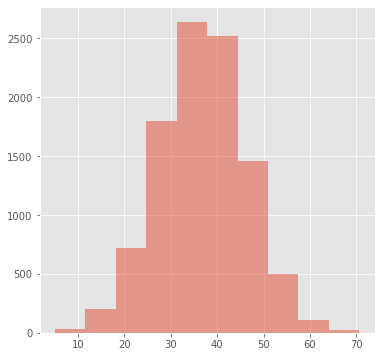

In [34]:
plt.figure(figsize=(6,6))
plt.hist(diffs_aov, alpha = 0.5);

In [35]:
diff_aov_arr = np.array(diffs_aov)
null_aov_vals = np.random.normal(0, diff_aov_arr.std(), diff_aov_arr.size)

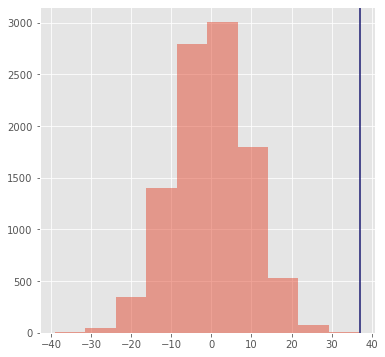

In [36]:
plt.figure(figsize=(6,6))
plt.hist(null_aov_vals, alpha = 0.5)
plt.axvline(x=diff_aov, color='#191970')

In [37]:
p_val = (null_aov_vals > diff_aov).mean()
p_val

0.0

### **Conclusion**

- We notice that the observed value is a little bit close to the null hypothesis values..

- A p-value result **0.0** we should reject our null hypothesis in favor of an alternative hypothesis..

- With **95% confidence**, there's statistical evidence to say that there's a difference between the AOVs of the new and old pages..

**Is this difference practically significant?**

- In a business context, with the observed difference of **37 US Dollars** is not necessarily a significant increment but there's an improvement by introducing the new payment options..

### #Product Description Pages (PDPs) - Engagement time

- The company also applied some adjustments to the product pages, changing some CTAs: like changing the names of buttons, and the direction of the overview, ..., etc.Now they are interested to see if there's any difference in the visitors behavior, in terms of engagement time with their products, CTR.

In [38]:
df_engmnt = pd.read_csv('pdp_engagement_time.csv')
df_engmnt.head(6)

,id,group,pdp_page,engagement_time
0,23899,control,old page,3.9
1,12757,control,old page,3.0
2,27727,treatment,new page,3.8
3,16679,control,old page,1.7
4,29703,treatment,new page,3.7
5,19198,control,old page,2.5


**The AVG engagement time of the old page**

In [39]:
avg_eng_old = df_engmnt.query('pdp_page == "old page"').engagement_time.mean()
print('The AVG of the engagement time of the old page is : {} minutes'.format(round(avg_eng_old, 1)))

The AVG of the engagement time of the old page is : 2.5 minutes


**The AVG engagement time of the new page**

In [40]:
avg_eng_new = df_engmnt.query('pdp_page == "new page"').engagement_time.mean()
print('The AVG of the engagement time of the new page is : {} minutes'.format(round(avg_eng_new, 1)))

The AVG of the engagement time of the new page is : 4.0 minutes


**The difference between the AVGs of the old & new pages**

In [41]:
diff_eng = avg_eng_new - avg_eng_old
print('The difference between the AVGs of the old & new pages is: {} minutes'.format(round(diff_eng, 1)))

The difference between the AVGs of the old & new pages is: 1.5 minutes


At the level of significance (0.05), Do we have significant evidence to say there's a difference in the averge engagement time of the two page ?

**Null Hypothesis** : AVG Engagement Time *(new)* - AVG Engagement Time *(old)* =< 0

**Alternative Hypothesis** : AVG Engagement Time *(new)* - AVG Engagement Time *(old)* > 0

In [42]:
diffs_eng = []

for diff in range(10000):
    b_samp = df_engmnt.sample(df_engmnt.shape[0], replace=True)
    avg_eng_old = b_samp.query('pdp_page == "old page"').engagement_time.mean()
    avg_eng_new = b_samp.query('pdp_page == "new page"').engagement_time.mean()
    diff_eng = avg_eng_new - avg_eng_old
    diffs_eng.append(diff_eng)
len(diffs_eng)

10000

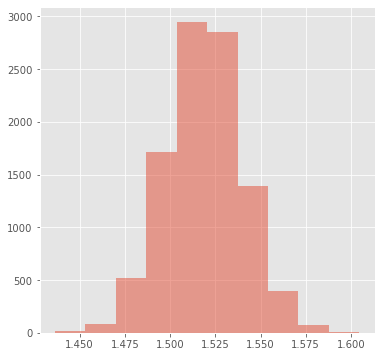

In [43]:
plt.figure(figsize=(6,6))
plt.hist(diffs_eng, alpha = 0.5);

In [44]:
diff_eng_arr = np.array(diffs_aov)
null_eng_vals = np.random.normal(0, diff_eng_arr.std(), diff_eng_arr.size)

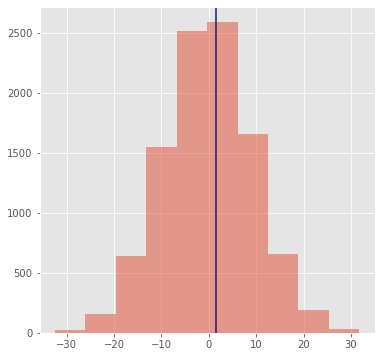

In [45]:
plt.figure(figsize=(6,6))
plt.hist(null_eng_vals, alpha = 0.5)
plt.axvline(x=diff_eng, color='#191970')

In [46]:
p_val = (null_eng_vals > diff_eng).mean()
p_val

0.4312

### **Conclusion**

-  Since the p-value of **0.4** is more than the significant level (0.05), we failed to reject the null hypothesis, therefore there's no statistical evidence to prove the alternative hypothesis is true..


**Is this difference practically significant?**

- The difference of **1.5 minutes** is not a significant difference to say the new design is better than the old design, however the new design has made visitors spend more time by 1.5 minutes on average. And maybe the visitors didn't take their time to properly adapt to the new adjustments, thus we can run the experiment for more time to observe if there's any changes in the visitors behavior, then draw the conclusions again..

### #Product Description Pages (PDPs) - CTR

- The company did a lot of changes to the product pages but they were most concerned  about whether the adjustment they made to the buy button in the product pages has actually improved the click-through-rate..

In [47]:
pdp_acts = pd.read_csv('pdp_actions.csv')
pdp_acts.sample(6)

,id,group,pdp_page,cta,actions
2337,36061,control,old page,buy btn,view
4366,609295,treatment,new page,order btn,view
3785,628052,treatment,new page,order btn,view
4126,664414,treatment,new page,order btn,click
4030,41994,control,old page,buy btn,view
4010,484279,treatment,new page,order btn,click


**Click-Through-Rate (CTR) of the CTA (buy btn)**

In [48]:
click_buy = pdp_acts.query('cta == "buy btn" & actions == "click"').id.nunique()
view_buy = pdp_acts.query('cta == "buy btn" & actions == "view"').id.nunique()
conv_rate_pdp_buy = CTR_func(click_buy, view_buy)
print('The CTR of the CTA (buy btn) is: {} %'.format(round(conv_rate_pdp_buy, 1)))

The CTR of the CTA (buy btn) is: 34.0 %


**Click-Through-Rate (CTR) of the CTA (order btn)**

In [49]:
click_ord = pdp_acts.query('cta == "order btn" & actions == "click"').id.nunique()
view_ord = pdp_acts.query('cta == "order btn" & actions == "view"').id.nunique()
conv_rate_pdp_ord = CTR_func(click_ord, view_ord)
print('The CTR of the CTA (order btn) is: {} %'.format(round(conv_rate_pdp_ord, 1)))

The CTR of the CTA (order btn) is: 40.0 %


**The difference between the buy btn & order btn**

In [50]:
diff_cta = conv_rate_pdp_ord - conv_rate_pdp_buy
print('The difference between the buy btn and the order btn is: {} %'.format(round(diff_cta, 1)))

The difference between the buy btn and the order btn is: 6.0 %


At the level of significance (0.05), Do we have significant evidence to say there's a difference in the CTRs of the buy btn and order btn?

**Null Hypothesis** : CTR *(order btn)* - CTR *(buy btn)* =< 0

**Alternative Hypothesis** : CTR *(order btn)* - CTR *(buy btn)* > 0

In [51]:
diffs_cta = []

for diff in range(10000):
    b_samp = pdp_acts.sample(pdp_acts.shape[0], replace=True)
    click_buy = b_samp.query('cta == "buy btn" & actions == "click"').id.nunique()
    view_buy = b_samp.query('cta == "buy btn" & actions == "view"').id.nunique()
    click_ord = b_samp.query('cta == "order btn" & actions == "click"').id.nunique()
    view_ord = b_samp.query('cta == "order btn" & actions == "view"').id.nunique()
    
    conv_rate_pdp_buy = CTR_func(click_buy, view_buy)
    conv_rate_pdp_ord = CTR_func(click_ord, view_ord)
    
    diffs_cta.append(conv_rate_pdp_ord - conv_rate_pdp_buy)
len(diffs_cta)

10000

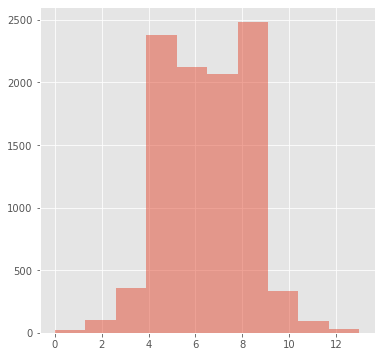

In [52]:
plt.figure(figsize=(6,6))
plt.hist(diffs_cta, alpha = 0.5);

In [53]:
diff_cta_arr = np.array(diffs_cta)
null_cta_vals = np.random.normal(0, diff_cta_arr.std(), diff_cta_arr.size)

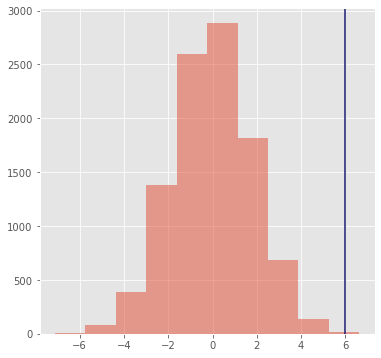

In [54]:
plt.figure(figsize=(6,6))
plt.hist(null_cta_vals, alpha = 0.5)
plt.axvline(x=diff_cta, color='#191970')

In [55]:
p_val = (null_cta_vals > diff_cta).mean()
p_val

0.0005

### **Conclusion**

-  Since the p-value of **0.0005** is less than the level of significance (0.05), we reject the null hypothesis, therefore we have enough statistical evidence to prove that our alternative hypothesis is true..


**Is this difference practically significant?**

- The difference of **7%** is not practically a significant difference to say the new design has better click through rate than the old design, however the new design increases the CTR. As well as the engagement time, maybe the visitors didn't take their time to properly adapt to the new adjustments, thus we can run the experiment for more time to observe if there's any changes in the visitors behavior, then draw the conclusions again..

### #Signup Conversions - Conversion Rate

- Also, the company did some adjustments to the sign up banner like changing the color to brighter color , the placements , the text and so on.They ran an experiment for 2 weeks to observe the visitors behavior regarding these adjustments..

In [56]:
df_sign = pd.read_csv('signup_conversions.csv')
df_sign.head(2)

,id,group,page,converted
0,12543,control,old page,yes
1,12084,control,old page,no


**Conversion rate of the old page**

In [57]:
old_conv = df_sign.query('page == "old page" & converted == "yes"').id.count()
old_count = df_sign.query('page == "old page"').id.count()

old_conv_rate = round(old_conv / old_count, 2)*100

print('The conversion rate of signups the old page is: {} %'.format(old_conv_rate))

The conversion rate of signups the old page is: 15.0 %


**Conversion rate of the new page**

In [58]:
new_conv = df_sign.query('page == "new page" & converted == "yes"').id.count()
new_count = df_sign.query('page == "new page"').id.count()

new_conv_rate = round(new_conv/ new_count, 2)*100

print('The conversion rate of signups the new page is: {} %'.format(new_conv_rate))

The conversion rate of signups the new page is: 20.0 %


**The difference between the conversion rates of the signup of the old and new pages**

In [59]:
diff_sign = new_conv_rate - old_conv_rate
print('The difference between the conversion rates of the sign up of the old and the new pages is: {}%'.format(diff_sign))

The difference between the conversion rates of the sign up of the old and the new pages is: 5.0%


At the level of significance (0.05), Do we have significant evidence to say there's a difference in the conversion rates of the old and the new page?

**Null Hypothesis** : Conversion Rate *(new)* - Conversion Rate *(old)* =< 0

**Alternative Hypothesis** : Conversion Rate *(new)* - Conversion Rate *(old)* > 0

In [60]:
diffs_sign = []

for diff in range(10000):
    b_samp = df_sign.sample(df_sign.shape[0], replace=True)
    old_conv = b_samp.query('page == "old page" & converted == "yes"').id.count()
    old_count = b_samp.query('page == "old page"').id.count()
    new_conv = b_samp.query('page == "new page" & converted == "yes"').id.count()
    new_count = b_samp.query('page == "new page"').id.count()

    new_conv_rate = round(new_conv/ new_count, 2)*100
    old_conv_rate = round(old_conv / old_count, 2)*100
    
    diffs_sign.append(new_conv_rate - old_conv_rate)
len(diffs_sign)

10000

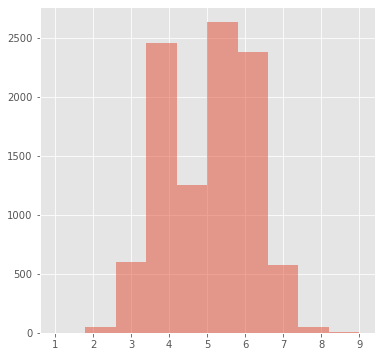

In [61]:
plt.figure(figsize=(6,6))
plt.hist(diffs_sign, alpha = 0.5);

In [62]:
diff_sign_arr = np.array(diffs_sign)
null_sign_vals = np.random.normal(0, diff_sign_arr.std(), diff_sign_arr.size)

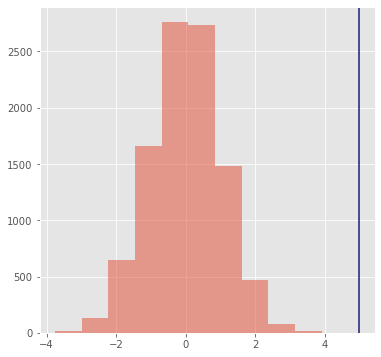

In [63]:
plt.figure(figsize=(6,6))
plt.hist(null_sign_vals, alpha = 0.5)
plt.axvline(x=diff_sign, color='#191970')

In [64]:
p_val = (null_sign_vals > diff_sign).mean()
p_val

0.0

### **Conclusion**

- A p-value result **0.0** indicates that we should reject our null hypothesis in favor of an alternative hypothesis..

- With **95% confidence**, there's statistical evidence to say that there's a difference between the conversion rate of the signup of the new and old pages..

**Is this difference practically significant?**

- In a business context, with the observed difference of **5%** is not necessarily a significant increment,  but there's an improvement in the conversion rate of the new page..